## Correlation variables in film industry

###### Dataset from: https://www.kaggle.com/danielgrijalvas/movies

In [3]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [96]:
data = pd.read_csv('movies.csv')

In [97]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [98]:
df = data.copy()

In [7]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


### Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [9]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [10]:
df['country'].unique()

array(['United Kingdom', 'United States', 'South Africa', 'West Germany',
       'Canada', 'Australia', 'Libya', 'Italy', 'Soviet Union', 'France',
       'Hong Kong', 'South Korea', 'Sweden', 'Spain', 'Mexico',
       'Switzerland', 'Netherlands', 'New Zealand', 'Philippines',
       'Israel', 'Japan', 'Hungary', 'Brazil', 'Yugoslavia', 'Argentina',
       'Taiwan', 'Ireland', 'Denmark', 'Germany', 'Iran', 'China',
       'Belgium', 'Austria', 'Portugal', 'Vietnam',
       'Republic of Macedonia', 'Russia',
       'Federal Republic of Yugoslavia', 'Greece', 'Czech Republic',
       'Norway', 'India', 'Jamaica', 'Aruba', 'Thailand', 'Colombia',
       'Romania', nan, 'United Arab Emirates', 'Indonesia', 'Turkey',
       'Serbia', 'Poland', 'Kenya', 'Finland', 'Iceland', 'Chile',
       'Panama', 'Malta', 'Lebanon'], dtype=object)

In [11]:
df.shape

(7668, 15)

Removing missing values

In [12]:
df[df['country'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,NaN,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,NaN,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,NaN,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,NaN,NaN,NaN,NaN
7615,Clinton Road,NaN,Horror,2019,"June 14, 2019 (United States)",5.9,1900.0,Richard Grieco,Noel Ashman,Ace Young,NaN,2500000.0,50400.0,Growing Tree Productions,77.0


In [13]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


Fill missing values with mean

In [15]:
df['gross'].fillna((df['gross'].mean()), inplace=True)

In [16]:
df['budget'].fillna((df['budget'].mean()), inplace=True)

In [17]:
df['score'].fillna((df['score'].mean()), inplace=True)

In [18]:
df['votes'].fillna((df['votes'].mean()), inplace=True)

In [19]:
df['runtime'].fillna((df['runtime'].mean()), inplace=True)

In [20]:
df.isnull().sum()

name         0
rating      77
genre        0
year         0
released     2
score        0
votes        0
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      0
dtype: int64

Removing missing data

In [21]:
df = df.dropna()

In [22]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [23]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

<AxesSubplot:>

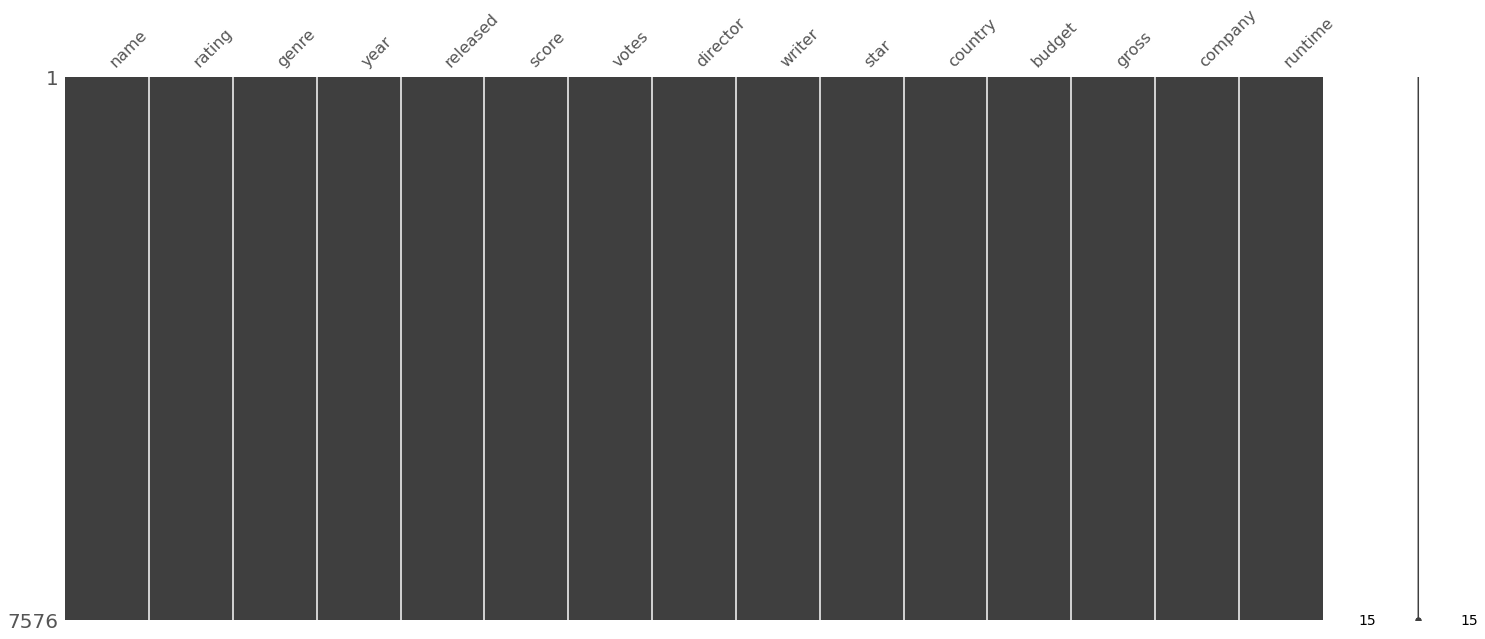

In [24]:
msno.matrix(df)

<AxesSubplot:>

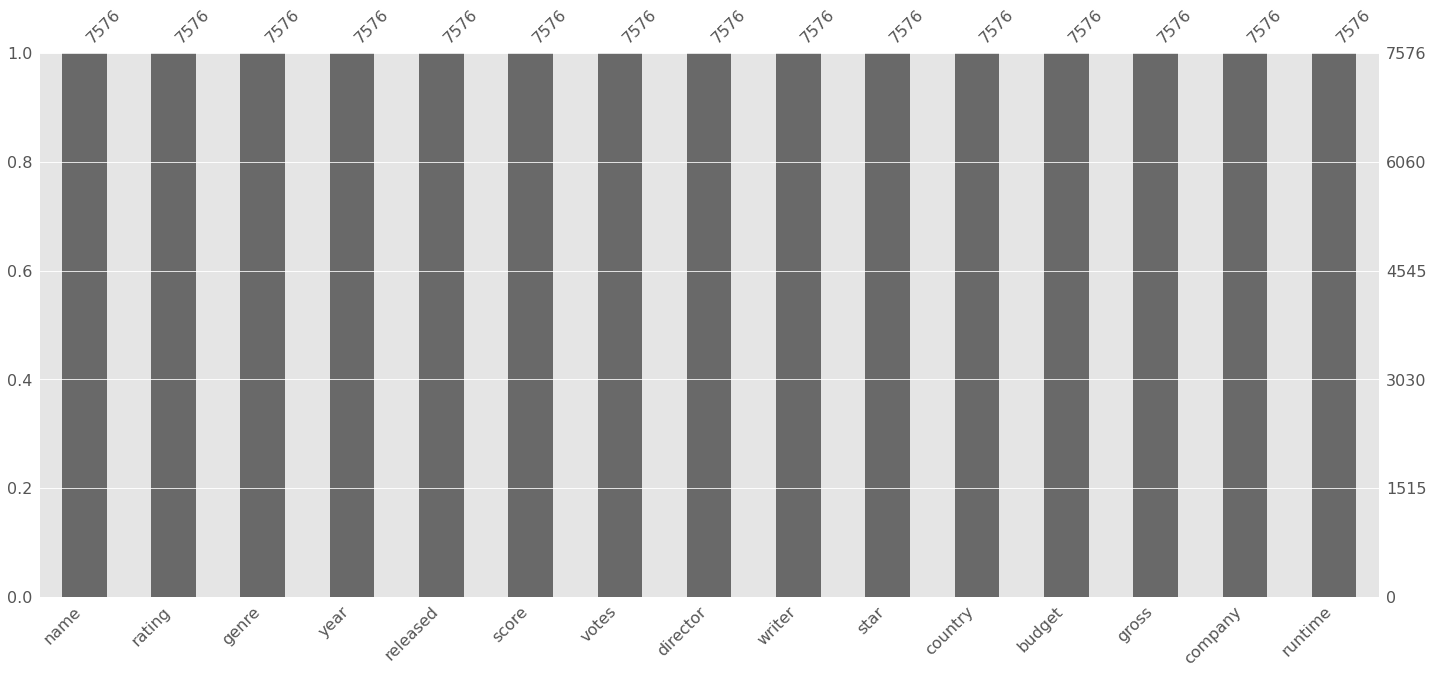

In [25]:
msno.bar(df)

In [26]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7576.000000,7576.000000,7.576000e+03,7.576000e+03,7.576000e+03,7576.000000
mean,2000.381204,6.389201,8.893430e+04,3.567737e+07,7.897755e+07,107.292933
std,11.110481,0.968364,1.640211e+05,3.526803e+07,1.644079e+08,18.582930
min,1980.000000,1.900000,3.500000e+01,3.000000e+03,3.090000e+02,63.000000
25%,1991.000000,5.800000,9.400000e+03,1.400000e+07,4.844968e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,3.558988e+07,2.151432e+07,104.000000
75%,2010.000000,7.100000,9.400000e+04,3.558988e+07,7.850054e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [27]:
df.shape

(7576, 15)

<AxesSubplot:>

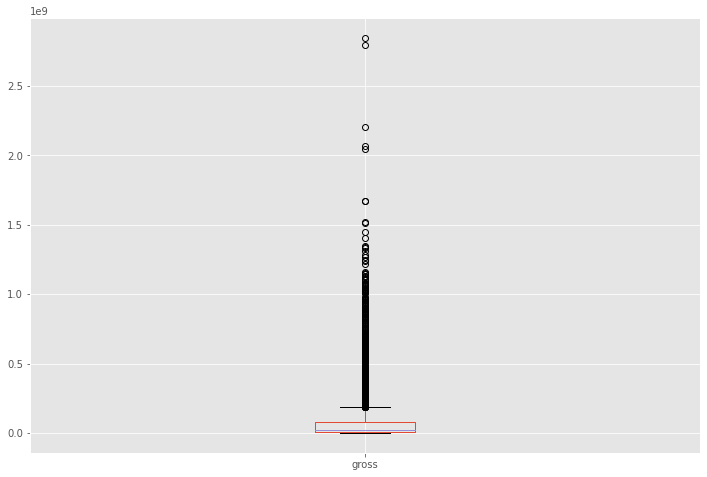

In [28]:
df.boxplot(column=['gross'])

Are there any outliers?

In [29]:
pd.set_option('display.max_rows', None)

Due the released date and year doesn't match in all cases

In [33]:
split = df['released'].str.split(',', expand=True).pipe(lambda x: x.set_axis(x.columns + 1, axis=1)).add_prefix('date_').fillna('')


In [35]:
df = pd.concat([df, split], axis=1)

In [ ]:
df.head(100)

In [39]:
df.drop(['year'], axis=1, inplace=True)

In [43]:
df['year'] = df['date_2'].astype(str).str[:5]

In [46]:
df.head(5)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date_1,year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June 13,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July 2,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June 20,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July 2,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July 25,1980


In [45]:
df.drop(['date_2'], axis=1, inplace=True)

In [48]:
df.drop(['released'], axis=1, inplace=True)

In [ ]:
## df.sort_values(by =['gross'], inplace = False,ascending = False )

In [93]:
df.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,date_1,year
0,6508,6,6,8.4,927000.0,2545,3960,1022,54,19000000.0,46998772.0,2274,146.0,211,1
1,5500,6,1,5.8,65000.0,2234,1613,316,55,4500000.0,58853106.0,710,104.0,187,1
2,5075,4,0,8.7,1200000.0,1093,2535,1708,55,18000000.0,538375067.0,1506,124.0,222,1
3,282,4,4,7.7,221000.0,1279,1976,2198,55,3500000.0,83453539.0,1770,88.0,187,1
4,1016,6,4,7.3,108000.0,1037,511,398,55,6000000.0,39846344.0,1737,98.0,193,1


### Hypothesis: The more money they spend the more money they're going to bring in

Budget, Company will have high correlation

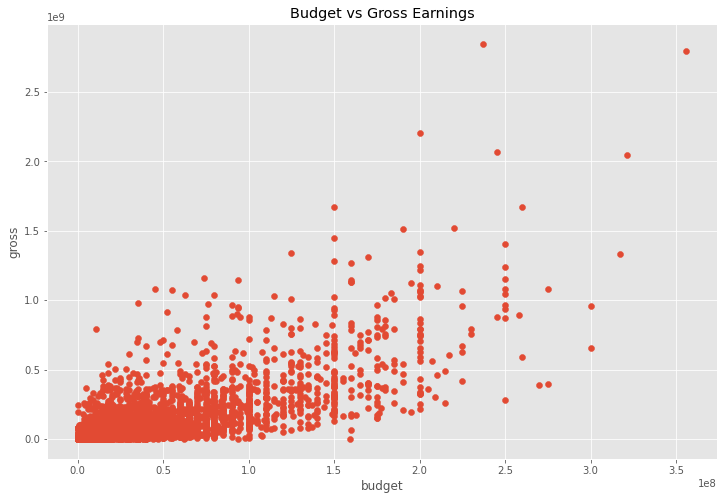

In [52]:
#Scatter plot with gross and budget

plt.scatter(x = df['budget'], y = df['gross'])
plt.title("Budget vs Gross Earnings")
plt.xlabel('budget')
plt.ylabel('gross')
plt.show()

###### Are they correlated?

<AxesSubplot:xlabel='budget', ylabel='gross'>

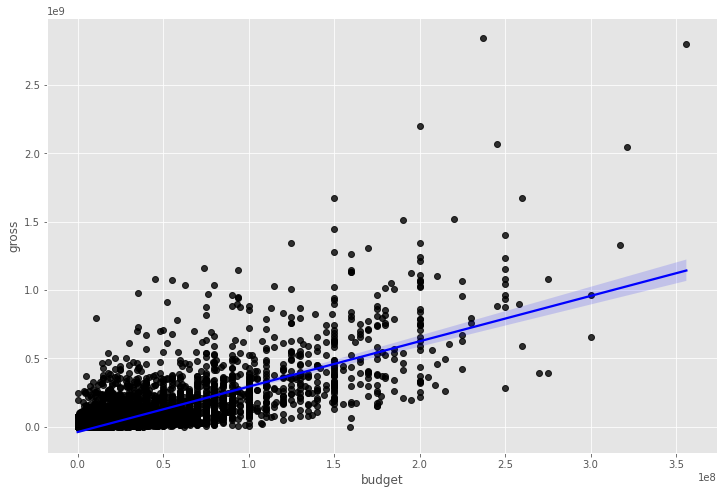

In [57]:
# Budget vs gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {'color':'black'}, line_kws ={'color': 'blue'}) 

Let's  start looking the correlation

In [65]:
df.corr(method = 'pearson') #pearson,kendall,spearman

,score,votes,budget,gross,runtime
score,1.000000,0.411938,0.064654,0.185084,0.400526
votes,0.411938,1.000000,0.421218,0.629325,0.309353
budget,0.064654,0.421218,1.000000,0.712561,0.265934
gross,0.185084,0.629325,0.712561,1.000000,0.241618
runtime,0.400526,0.309353,0.265934,0.241618,1.000000


High correlation between budget and gross 

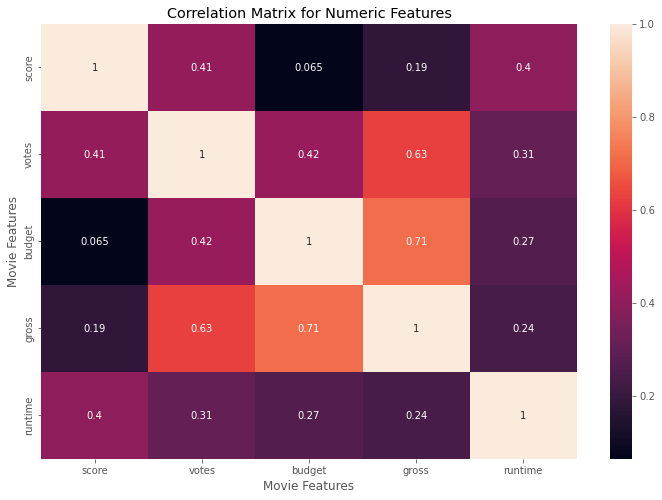

In [70]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

###### Correlation with company
Since company is not numerical we will convert it

In [80]:
print(len(df['company'].unique()))

2340


In [83]:
df_num = df.copy()

for col_name in df_num:
    if(df_num[col_name].dtype == 'object'):
        df_num[col_name] =  df_num[col_name].astype('category')
        df_num[col_name] =  df_num[col_name].cat.codes
            


In [84]:
df_num.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,date_1,year
0,6508,6,6,8.4,927000.0,2545,3960,1022,54,19000000.0,46998772.0,2274,146.0,211,1
1,5500,6,1,5.8,65000.0,2234,1613,316,55,4500000.0,58853106.0,710,104.0,187,1
2,5075,4,0,8.7,1200000.0,1093,2535,1708,55,18000000.0,538375067.0,1506,124.0,222,1
3,282,4,4,7.7,221000.0,1279,1976,2198,55,3500000.0,83453539.0,1770,88.0,187,1
4,1016,6,4,7.3,108000.0,1037,511,398,55,6000000.0,39846344.0,1737,98.0,193,1


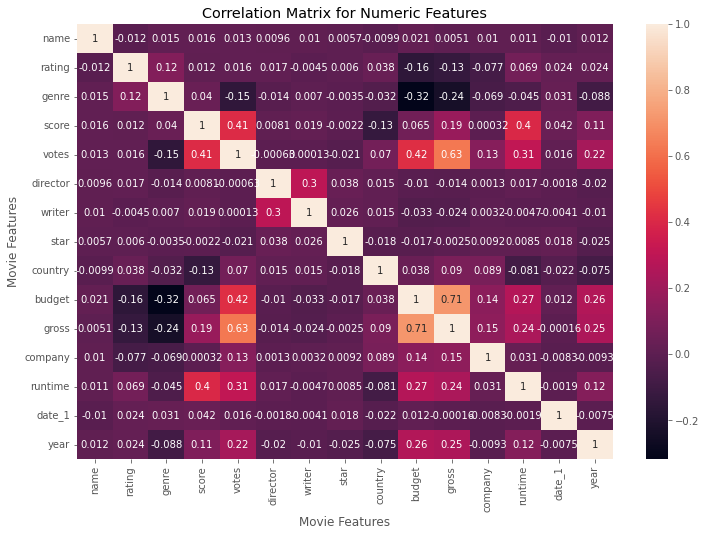

In [85]:
correlation_matrix = df_num.corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [86]:
df_num.corr()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,date_1,year
name,1.000000,-0.011944,0.015250,0.016160,0.013174,0.009605,0.010271,0.005666,-0.009942,0.020954,0.005071,0.010085,0.011130,-0.010039,0.012090
rating,-0.011944,1.000000,0.117657,0.011562,0.016092,0.017211,-0.004538,0.005972,0.037765,-0.156385,-0.129384,-0.076860,0.069152,0.024120,0.024249
genre,0.015250,0.117657,1.000000,0.040281,-0.148341,-0.013502,0.006956,-0.003450,-0.031503,-0.316818,-0.238240,-0.068755,-0.044531,0.031023,-0.088346
score,0.016160,0.011562,0.040281,1.000000,0.411938,0.008074,0.018887,-0.002196,-0.130144,0.064654,0.185084,0.000325,0.400526,0.041759,0.108649
votes,0.013174,0.016092,-0.148341,0.411938,1.000000,-0.000628,0.000133,-0.020975,0.069563,0.421218,0.629325,0.129579,0.309353,0.015912,0.223856
director,0.009605,0.017211,-0.013502,0.008074,-0.000628,1.000000,0.297418,0.037564,0.015242,-0.010373,-0.014106,0.001328,0.017403,-0.001765,-0.020391
writer,0.010271,-0.004538,0.006956,0.018887,0.000133,0.297418,1.000000,0.026462,0.014936,-0.033407,-0.023732,0.003174,-0.004657,-0.004082,-0.010046
star,0.005666,0.005972,-0.003450,-0.002196,-0.020975,0.037564,0.026462,1.000000,-0.017577,-0.017244,-0.002506,0.009243,0.008550,0.018379,-0.025371
country,-0.009942,0.037765,-0.031503,-0.130144,0.069563,0.015242,0.014936,-0.017577,1.000000,0.038387,0.090446,0.088941,-0.081417,-0.021778,-0.075105
budget,0.020954,-0.156385,-0.316818,0.064654,0.421218,-0.010373,-0.033407,-0.017244,0.038387,1.000000,0.712561,0.144166,0.265934,0.012391,0.262555


In [87]:
correlation_matrix_num = df_num.corr()
corr_pairs = correlation_matrix_num.unstack()

In [ ]:
corr_pairs

In [ ]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

In [90]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross     votes       0.629325
votes     gross       0.629325
budget    gross       0.712561
gross     budget      0.712561
name      name        1.000000
star      star        1.000000
runtime   runtime     1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
genre     genre       1.000000
rating    rating      1.000000
date_1    date_1      1.000000
year      year        1.000000
dtype: float64

Votes and budget have the highest correlation to gross earnings
Company has low correlation

###### Observations

In [100]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [ ]:
df.groupby(['company', 'year'])[["gross"]].sum()

In [102]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2010    3300479986
                       2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Name: gross, dtype: int64

/home/aldos/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 94.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/aldos/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 83.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/aldos/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 45.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/aldos/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 79.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/aldos/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:129

<AxesSubplot:xlabel='rating', ylabel='gross'>

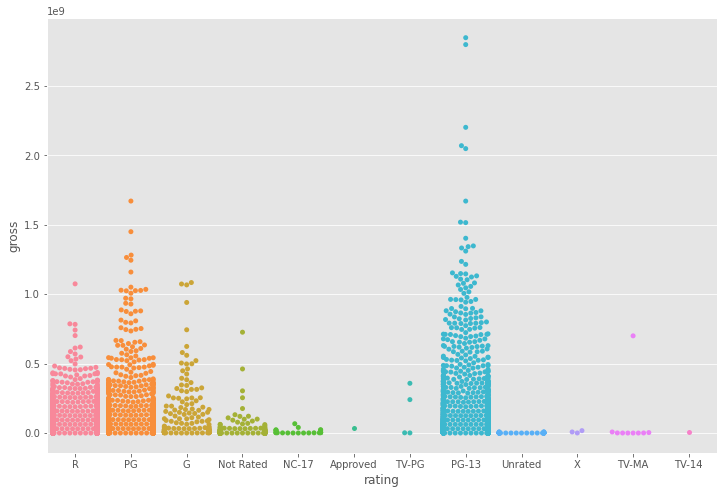

In [103]:
sns.swarmplot(x="rating", y="gross", data=df)

<AxesSubplot:xlabel='rating', ylabel='gross'>

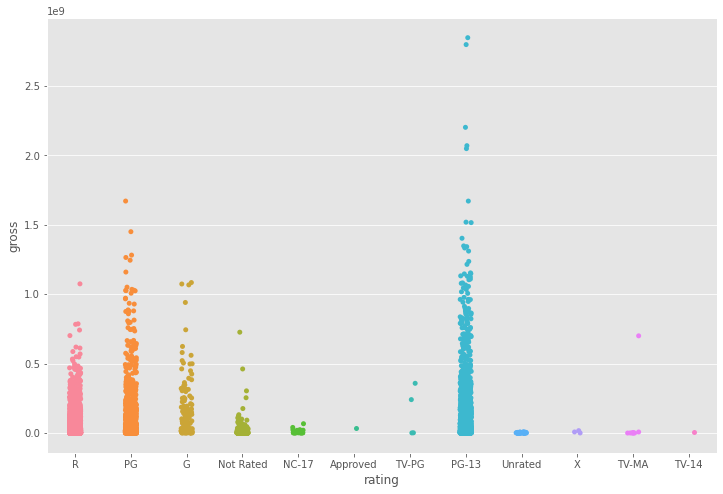

In [104]:
sns.stripplot(x="rating", y="gross", data=df)